# Random walk on hypergraphs
In this tutorial, we show how to simulate random walks on hypergraphs.

Source: 

Carletti T., Battiston F., Cencetti G., Fanelli D., _Random walks on hypergraphs_, Physical Review E 101, 022308



## Overview

- Build random-walk transition matrices for hypergraphs.
- Explore how structure affects diffusion dynamics.


## Setup


In [ ]:
import matplotlib as mpl

mpl.rcParams.update({
    "figure.figsize": (6, 4),
    "figure.dpi": 120,
    "savefig.dpi": 150,
})


In [1]:
import sys
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt

sys.path.append("..")
from hypergraphx.core.hypergraph import Hypergraph
from hypergraphx.linalg.linalg import *
from hypergraphx.dynamics.randwalk import *
from hypergraphx.generation.random import *

np.random.seed(123)

### Generate transition matrix

In [2]:
HG = random_hypergraph(10, {2: 100, 3: 20, 4: 5})

In [3]:
T = transition_matrix(HG)

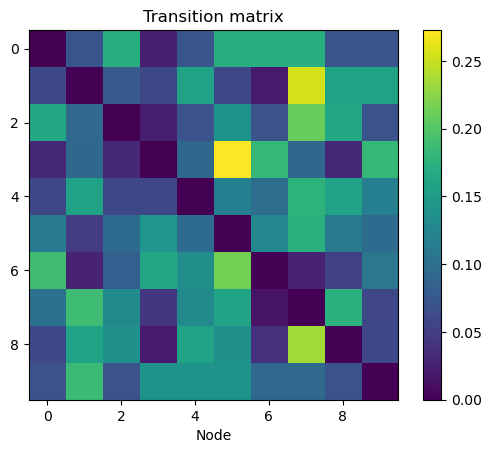

In [4]:
plt.imshow(T.todense())
plt.colorbar()
plt.xlabel("Node")
plt.title("Transition matrix")
plt.show()

In [5]:
starting_node = 0
time = 10000
visited_nodes_over_time = random_walk(HG, starting_node, time)

In [6]:
# how many times each node was visited
visited_nodes = Counter(visited_nodes_over_time)
# list to append the relative frequency of each node
relative_frequency = []
for k in set(visited_nodes.keys() ):
    relative_frequency.append(visited_nodes[k] / time)

In [7]:
starting_density = np.random.rand(HG.num_nodes())
starting_density = starting_density / np.sum(starting_density)
density_over_time = random_walk_density(HG, starting_density, time)

In [8]:
stationary_state = RW_stationary_state(HG)

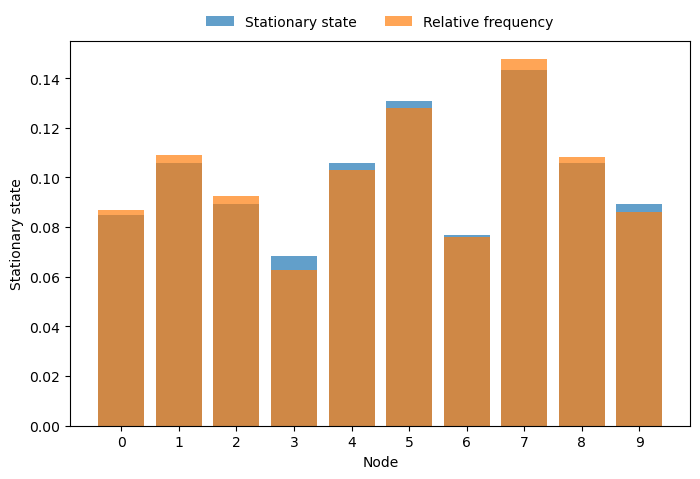

In [9]:
# column plot
plt.figure(figsize=(8, 5))
# I have to plot two bar plots to have two different colors, bars one next to the other


plt.bar(range(HG.num_nodes()), stationary_state, alpha=0.7)
plt.bar(range(HG.num_nodes()), relative_frequency,  alpha=0.7)
# one tick per node
plt.xticks(range(HG.num_nodes()), range(HG.num_nodes()));
plt.xlabel("Node")
plt.ylabel("Stationary state")
# label on top out of the plot
plt.legend(["Stationary state", "Relative frequency"], bbox_to_anchor=(.8, 1.1), frameon=False, ncol=2)

#plt.column(range(HG.num_nodes()), stationary_state)
plt.show()